# Predict Cell Phone Price range:

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
data=pd.read_csv('datasets_11167_15520_train.csv')

# Basic Checks

In [5]:
pd.set_option('display.max_columns',None)

In [6]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [7]:
data.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,16,483,754,3919,19,4,2,1,1,1,3


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [9]:
#pd.set_option('display.max_columns',None)
data.describe()


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [10]:
data.shape

(2000, 21)

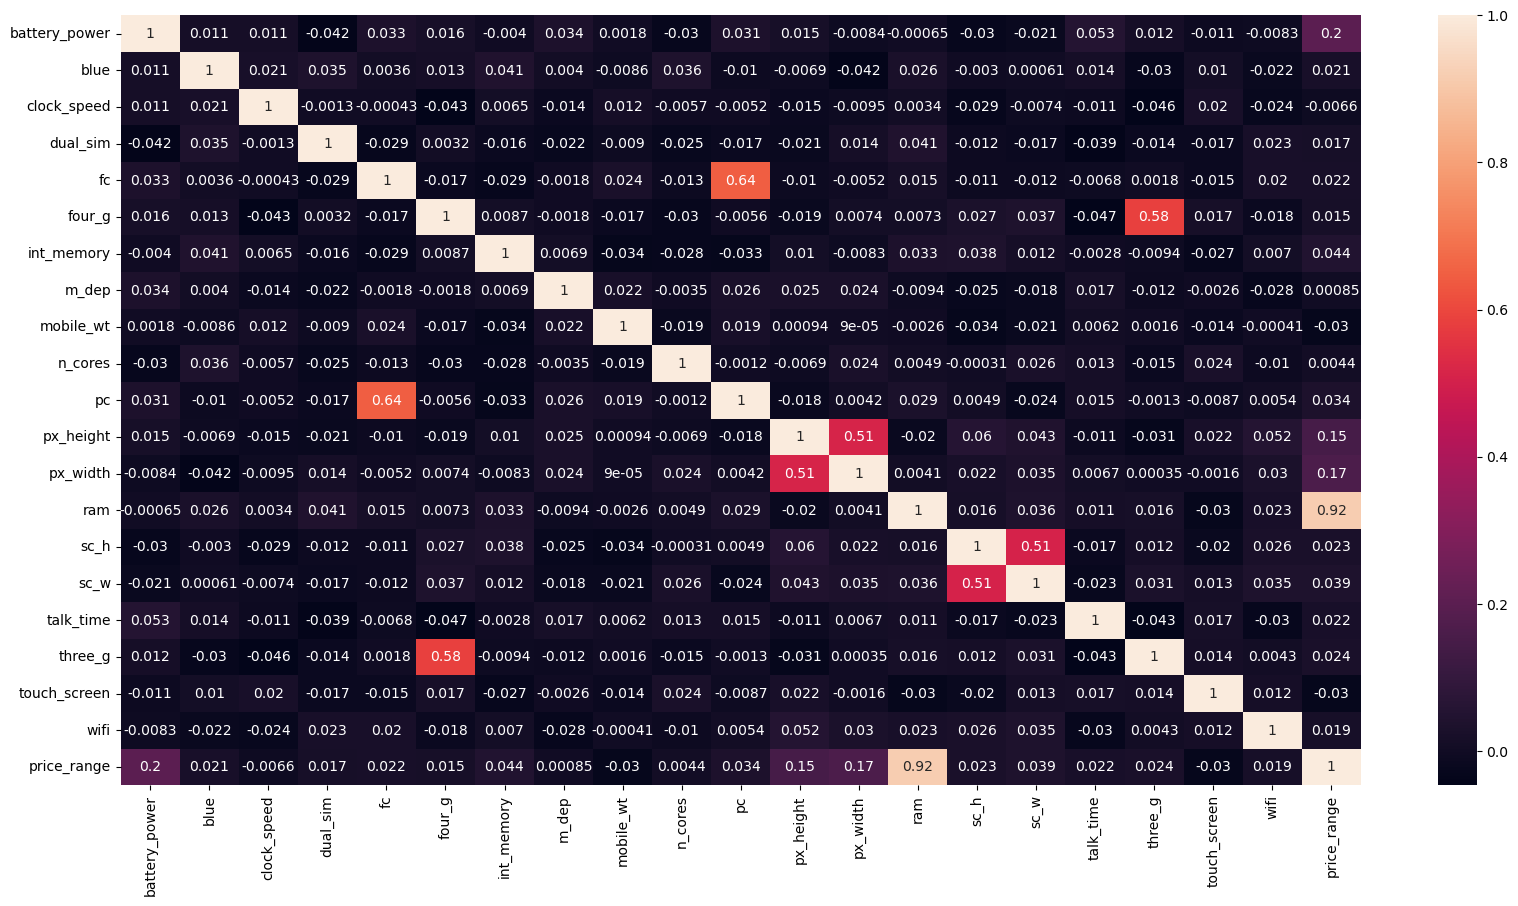

In [11]:
#Correlation
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [12]:
x1=data.iloc[:,:-1]
y1=data.price_range

In [13]:
x1.shape

(2000, 20)

In [14]:
y1.shape

(2000,)

In [15]:
bestfeature=SelectKBest(score_func=chi2,k=10)
fit=bestfeature.fit(x1,y1)

In [16]:
dfscores=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(x1.columns)

In [17]:
featurescores=pd.concat([dfcolumns,dfscores],axis=1)
featurescores.columns=['Feature','Scores']

In [18]:
featurescores

,Feature,Scores
0,battery_power,14129.866576
1,blue,0.723232
2,clock_speed,0.648366
3,dual_sim,0.631011
4,fc,10.135166
5,four_g,1.521572
6,int_memory,89.839124
7,m_dep,0.745820
8,mobile_wt,95.972863
9,n_cores,9.097556


In [19]:
print(featurescores.nlargest(10,'Scores'))

          Feature         Scores
13            ram  931267.519053
11      px_height   17363.569536
0   battery_power   14129.866576
12       px_width    9810.586750
8       mobile_wt      95.972863
6      int_memory      89.839124
15           sc_w      16.480319
16      talk_time      13.236400
4              fc      10.135166
14           sc_h       9.614878


The specifications like Ram,Pixel height,Battery power,Pixel width,Mobile weight,Internal Memory,Screen Width,Talk Time,Front Camera,
Screen Height make some grate impact price.

# Exploratory Data Analysis - EDA

In [22]:
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [23]:
#Handling Corrupt data
#No corrupted Data
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


# Relation between Ram and Price

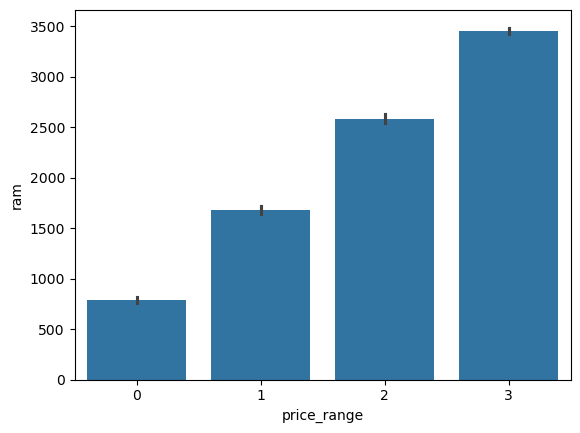

In [25]:
sns.barplot(x='price_range',y='ram',data=data)
plt.show()

 # Relation between pixel height and width

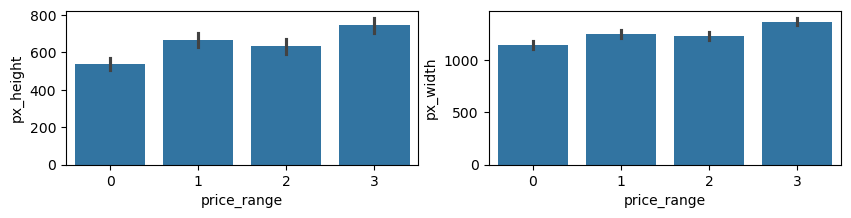

In [27]:
plt.figure(figsize=(10,2))
plt.subplot(1,2,1)
sns.barplot(x='price_range',y='px_height',data=data)
plt.subplot(1,2,2)
sns.barplot(x='price_range',y='px_width',data=data)
plt.show()

 # Relation between Battery power and price

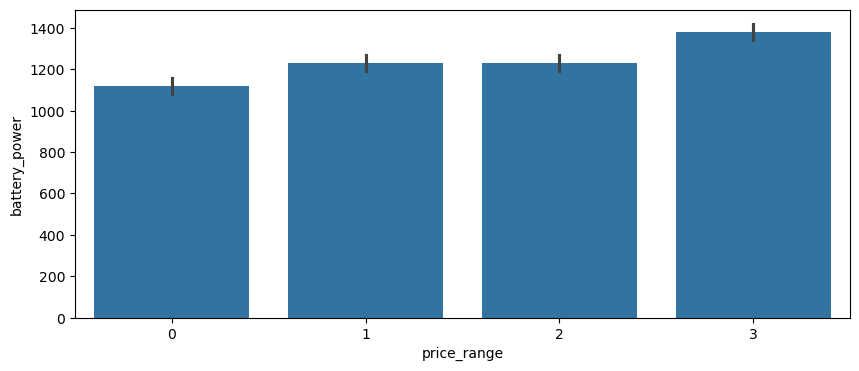

In [29]:
plt.figure(figsize=(10,4))
sns.barplot(x='price_range',y='battery_power',data=data)
plt.show()

 # Relation between internal memory and price 

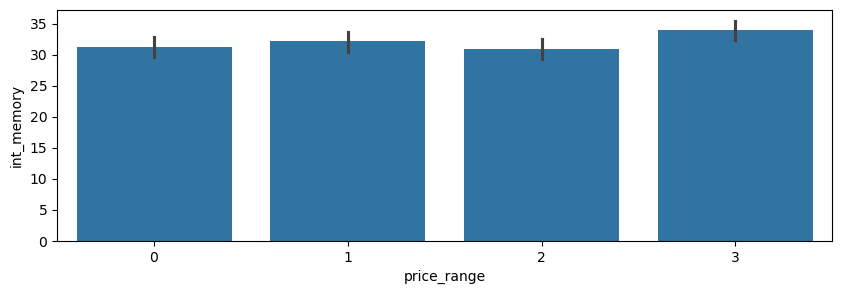

In [31]:
plt.figure(figsize=(10,3))
sns.barplot(x='price_range',y='int_memory',data=data)
plt.show()

<Axes: xlabel='dual_sim', ylabel='count'>

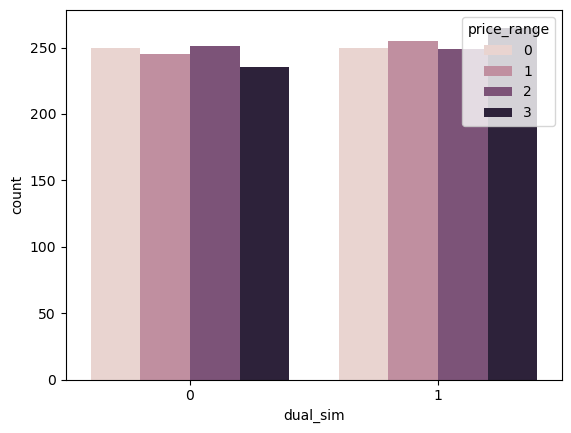

In [32]:
sns.countplot(x='dual_sim',hue='price_range',data=data)

 # Relation between screen height and width with price

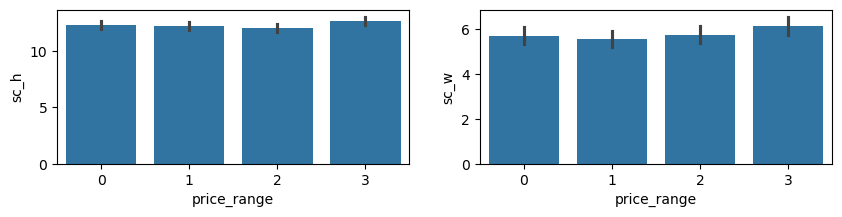

In [34]:
plt.figure(figsize=(10,2))
plt.subplot(1,2,1)
sns.barplot(x='price_range',y='sc_h',data=data)
plt.subplot(1,2,2)
sns.barplot(x='price_range',y='sc_w',data=data)
plt.show()

# Check Outliers

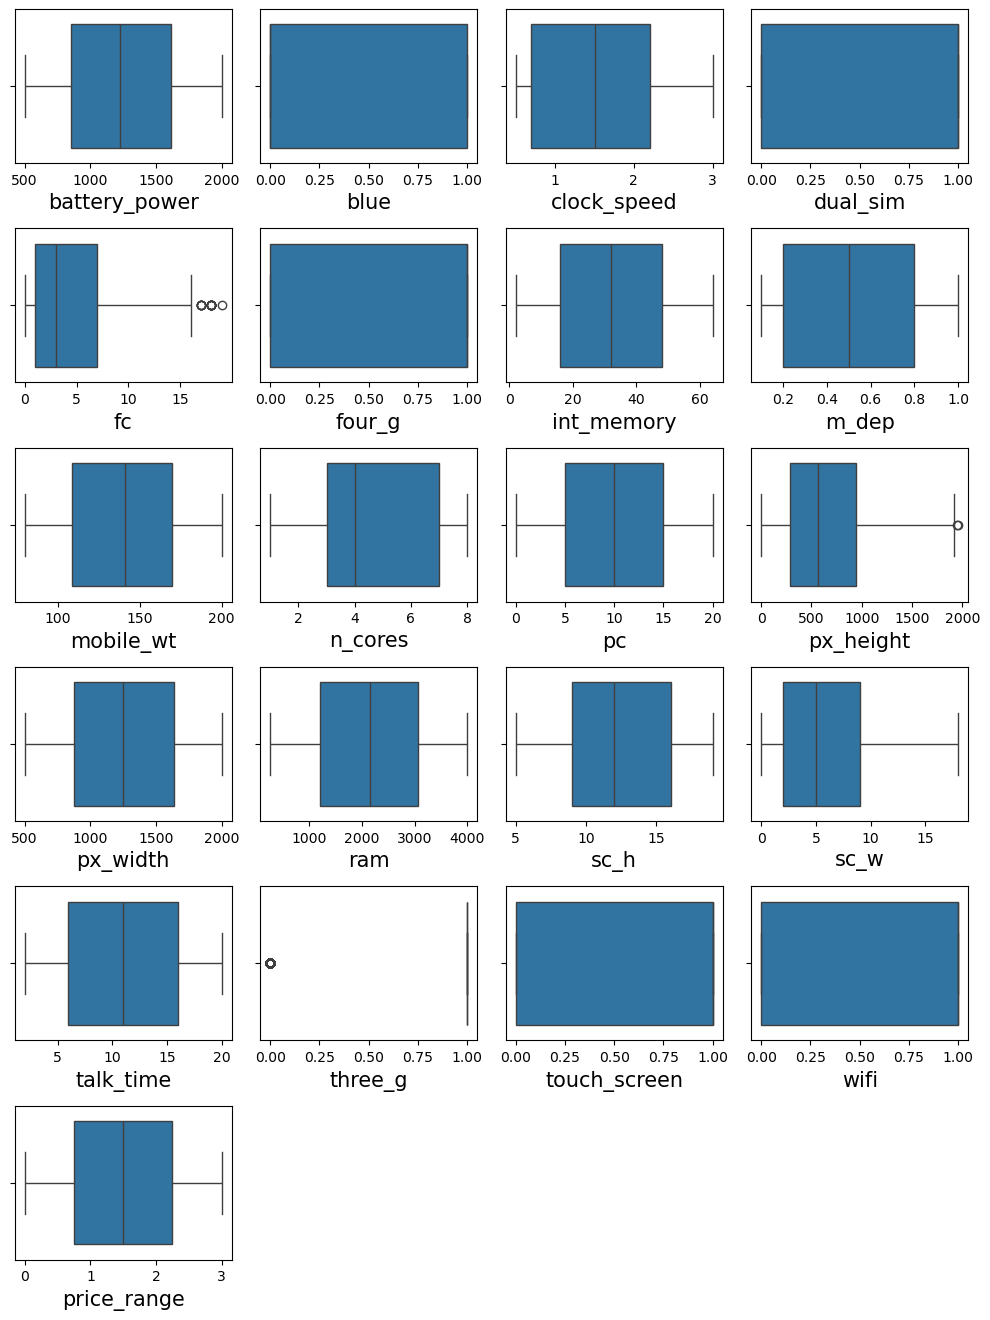

In [36]:
plt.figure(figsize=(10,15))
plotnumber=1

for column in data:
    plt.subplot(7,4,plotnumber)
    sns.boxplot(x=data[column])
    plt.xlabel(column,fontsize=15)
    plotnumber+=1
    plt.tight_layout()


In [37]:
data['three_g'].value_counts()

three_g
1    1523
0     477
Name: count, dtype: int64

In [38]:
#The Specification Front camera shows some outliers

<Axes: xlabel='three_g'>

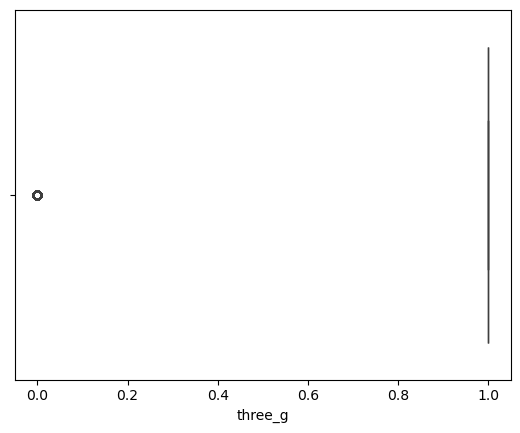

In [39]:
sns.boxplot(x='three_g',data=data)

<Axes: xlabel='fc', ylabel='Count'>

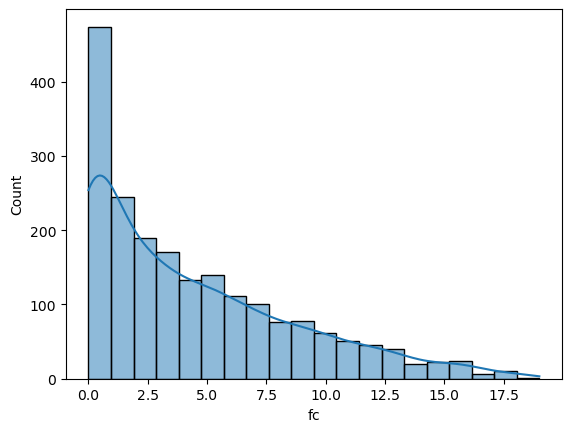

In [40]:
sns.histplot(x='fc',data=data,kde=True)

In [41]:
data['fc'].median()

3.0

In [42]:
#data.loc[data['fc']>13,'fc']=np.median(data['fc'])

In [43]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


<Axes: xlabel='fc'>

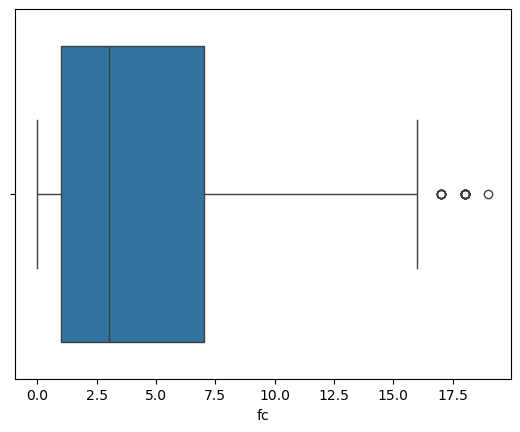

In [44]:
sns.boxplot(x='fc',data=data)

# Scaling the data

In [46]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
data1=sc.fit_transform(data.drop('price_range',axis=1))
data1

array([[0.22778891, 0.        , 0.68      , ..., 0.        , 0.        ,
        1.        ],
       [0.34736139, 1.        , 0.        , ..., 1.        , 1.        ,
        0.        ],
       [0.04141617, 1.        , 0.        , ..., 1.        , 1.        ,
        0.        ],
       ...,
       [0.94188377, 0.        , 0.16      , ..., 1.        , 1.        ,
        0.        ],
       [0.6753507 , 0.        , 0.16      , ..., 1.        , 1.        ,
        1.        ],
       [0.00601202, 1.        , 0.6       , ..., 1.        , 1.        ,
        1.        ]])

In [47]:
data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [48]:
data2=pd.DataFrame(data1,columns=['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'])
data2.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,0.227789,0.0,0.68,0.0,0.052632,0.0,0.080645,0.555556,0.900000,0.142857,0.10,0.010204,0.170895,0.612774,0.285714,0.388889,0.944444,0.0,0.0,1.0
1,0.347361,1.0,0.00,1.0,0.000000,1.0,0.822581,0.666667,0.466667,0.285714,0.30,0.461735,0.993324,0.634687,0.857143,0.166667,0.277778,1.0,1.0,0.0
2,0.041416,1.0,0.00,1.0,0.105263,1.0,0.629032,0.888889,0.541667,0.571429,0.30,0.644388,0.811749,0.627205,0.428571,0.111111,0.388889,1.0,1.0,0.0
3,0.076152,1.0,0.80,0.0,0.000000,0.0,0.129032,0.777778,0.425000,0.714286,0.45,0.620408,0.858478,0.671566,0.785714,0.444444,0.500000,1.0,0.0,0.0
4,0.881764,1.0,0.28,0.0,0.684211,1.0,0.677419,0.555556,0.508333,0.142857,0.70,0.616327,0.475300,0.308658,0.214286,0.111111,0.722222,1.0,1.0,0.0


In [49]:
final_df=pd.concat([data2,data['price_range']],axis=1)
final_df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,0.227789,0.0,0.68,0.0,0.052632,0.0,0.080645,0.555556,0.900000,0.142857,0.10,0.010204,0.170895,0.612774,0.285714,0.388889,0.944444,0.0,0.0,1.0,1
1,0.347361,1.0,0.00,1.0,0.000000,1.0,0.822581,0.666667,0.466667,0.285714,0.30,0.461735,0.993324,0.634687,0.857143,0.166667,0.277778,1.0,1.0,0.0,2
2,0.041416,1.0,0.00,1.0,0.105263,1.0,0.629032,0.888889,0.541667,0.571429,0.30,0.644388,0.811749,0.627205,0.428571,0.111111,0.388889,1.0,1.0,0.0,2
3,0.076152,1.0,0.80,0.0,0.000000,0.0,0.129032,0.777778,0.425000,0.714286,0.45,0.620408,0.858478,0.671566,0.785714,0.444444,0.500000,1.0,0.0,0.0,2
4,0.881764,1.0,0.28,0.0,0.684211,1.0,0.677419,0.555556,0.508333,0.142857,0.70,0.616327,0.475300,0.308658,0.214286,0.111111,0.722222,1.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.195725,1.0,0.00,1.0,0.000000,1.0,0.000000,0.777778,0.216667,0.714286,0.70,0.623469,0.927904,0.110102,0.571429,0.222222,0.944444,1.0,1.0,0.0,0
1996,0.977956,1.0,0.84,1.0,0.000000,0.0,0.596774,0.111111,0.891667,0.428571,0.15,0.466837,0.977971,0.474613,0.428571,0.555556,0.777778,1.0,1.0,1.0,2
1997,0.941884,0.0,0.16,1.0,0.052632,1.0,0.548387,0.666667,0.233333,1.000000,0.15,0.442857,0.755674,0.748530,0.285714,0.055556,0.166667,1.0,1.0,0.0,3
1998,0.675351,0.0,0.16,0.0,0.210526,1.0,0.709677,0.000000,0.541667,0.571429,0.25,0.171429,0.113485,0.163816,0.928571,0.555556,0.944444,1.0,1.0,1.0,0


# Model Creation (Logistic Regression)

In [51]:
#Independent and Dependent variable
x=final_df.iloc[:,:-1]
y=final_df.price_range

In [52]:
#Create training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=45)

In [53]:
final_df.shape

(2000, 21)

In [54]:
x_train.shape

(1600, 20)

In [55]:
x_test.shape

(400, 20)

In [56]:
y_train.shape

(1600,)

In [57]:
y_test.shape

(400,)

In [58]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(x_train,y_train) #training the model

LogisticRegression()

In [59]:
y_pred=clf.predict(x_test) #Prediction

In [60]:
from sklearn.metrics import accuracy_score,classification_report
lr_ac=accuracy_score(y_test,y_pred)
lr_ac

0.8975

In [61]:
cr=classification_report(y_test,y_pred)
print (cr)

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       104
           1       0.90      0.82      0.86       114
           2       0.87      0.84      0.85       105
           3       0.90      0.96      0.93        77

    accuracy                           0.90       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.90      0.90      0.90       400



# Model Creation (Support Vector Machine - SVM)

In [63]:
y_train.value_counts()

price_range
3    423
0    396
2    395
1    386
Name: count, dtype: int64

In [64]:
#SV Classifier model
from sklearn.svm import SVC
svclassifier=SVC() #object creation
svclassifier.fit(x_train,y_train)

SVC()

In [65]:
y_hat=svclassifier.predict(x_test)

In [66]:
sv_ac=accuracy_score(y_test,y_hat)
sv_ac

0.8525

In [67]:
cr_sv=classification_report(y_test,y_hat)

In [68]:
print(cr_sv)

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       104
           1       0.84      0.79      0.81       114
           2       0.78      0.81      0.79       105
           3       0.88      0.88      0.88        77

    accuracy                           0.85       400
   macro avg       0.85      0.86      0.86       400
weighted avg       0.85      0.85      0.85       400



# Decision Tree

In [70]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [71]:
y_test_predict=dt.predict(x_test)


In [72]:
dt_ac=accuracy_score(y_test,y_test_predict)
dt_ac

0.8325

In [73]:
y_test_predict

array([3, 0, 2, 0, 3, 0, 2, 2, 0, 1, 0, 0, 0, 0, 1, 3, 1, 1, 2, 0, 2, 1,
       1, 3, 3, 0, 2, 1, 2, 1, 3, 0, 1, 3, 0, 3, 0, 1, 3, 1, 0, 2, 2, 0,
       2, 0, 2, 1, 3, 2, 0, 3, 3, 1, 3, 3, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 0, 0, 1, 1,
       0, 1, 2, 1, 1, 1, 1, 0, 3, 3, 0, 3, 3, 1, 3, 0, 3, 3, 2, 1, 0, 3,
       2, 2, 1, 2, 2, 3, 0, 0, 0, 0, 2, 3, 0, 2, 1, 0, 3, 3, 1, 3, 1, 3,
       0, 1, 0, 1, 3, 0, 0, 2, 0, 2, 0, 2, 2, 0, 1, 3, 0, 0, 3, 0, 3, 0,
       2, 0, 0, 3, 2, 0, 0, 3, 1, 1, 0, 2, 2, 3, 2, 0, 3, 3, 1, 2, 0, 3,
       2, 2, 0, 2, 2, 3, 0, 2, 2, 3, 2, 3, 2, 0, 2, 2, 2, 3, 3, 3, 2, 2,
       0, 1, 2, 2, 3, 0, 0, 0, 2, 3, 2, 0, 1, 3, 0, 2, 1, 1, 0, 3, 2, 0,
       0, 0, 2, 2, 3, 1, 0, 2, 0, 3, 1, 1, 2, 0, 1, 3, 3, 2, 2, 0, 1, 1,
       3, 0, 1, 2, 1, 1, 2, 0, 0, 0, 1, 3, 0, 0, 0, 1, 3, 1, 1, 2, 1, 1,
       2, 2, 2, 2, 0, 3, 1, 1, 1, 2, 1, 3, 1, 2, 3, 3, 0, 1, 1, 1, 3, 2,
       2, 1, 0, 2, 2, 0, 3, 3, 1, 2, 2, 2, 2, 2, 3,

In [74]:
print(classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

           0       0.88      0.91      0.90       104
           1       0.80      0.75      0.77       114
           2       0.79      0.78      0.78       105
           3       0.88      0.91      0.89        77

    accuracy                           0.83       400
   macro avg       0.83      0.84      0.84       400
weighted avg       0.83      0.83      0.83       400



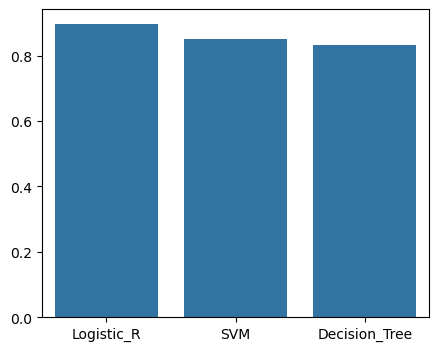

In [75]:
plt.figure(figsize=(5,4))
#sns.barplot(x=['Logistic_R','SVM','Decision_Tree'],height=[lr_ac,sv_ac,dt_ac])
sns.barplot(x=['Logistic_R','SVM','Decision_Tree'],y=[lr_ac,sv_ac,dt_ac])
plt.show()

# The Logistic Regression model gives an accuracy score of 90 and it will become a best model for production.